In [1]:
# Importing Dependencies

import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Defining csv file path
file_path_mouse_drug = os.path.join('mouse_drug_data.csv')
file_path_clinicaltrial_data = os.path.join('clinicaltrial_data.csv')

In [2]:
mouse_drug_df = pd.read_csv(file_path_mouse_drug) # Reading CSV file data
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinicaltrial_data_df = pd.read_csv(file_path_clinicaltrial_data) # Reading CSV file data
clinicaltrial_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Merging two data frames
Pymaceuticals_df = pd.merge(mouse_drug_df, clinicaltrial_data_df, on= 'Mouse ID') 

# Dropping duplicate values
Pymaceuticals_df.drop_duplicates(keep="first")

# Reading DataFrame with specific 'Drug' values (Capomulin, Infubinol, Ketapril, Placebo)
Pymaceuticals_required_df = Pymaceuticals_df[(Pymaceuticals_df['Drug'] == "Capomulin") |
                                    (Pymaceuticals_df['Drug'] == "Infubinol") |
                                    (Pymaceuticals_df['Drug'] == "Ketapril") |
                                    (Pymaceuticals_df['Drug'] == "Placebo")]
Pymaceuticals_required_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [5]:
# *** Tumor Response to Treatment ***

In [51]:
# Defing pd.pivot_table to get the below DataFrame format
Tumor_Volume_Avg = pd.pivot_table(Pymaceuticals_required_df, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)

In [93]:
Tumor_Volume_Avg

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [53]:
Tumor_Volume_Avg.reset_index(inplace=True) # Reseting Index to read respective column names

In [77]:
Tumor_Volume_Avg.columns

Index(['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [54]:
# Calulating Standard Error [SEM] of 'Tumor Volume' based on 'Drug' & 'Timepoint' indexes.
Tumor_Volume_Error = pd.DataFrame(Pymaceuticals_required_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [55]:
Tumor_Volume_Unstack = Tumor_Volume_Error.unstack(level=0) # Unstacking the Dataframe based on 'Drug'
Tumor_Volume_Unstack.columns = Tumor_Volume_Unstack.columns.get_level_values(1) # Unstacking and assigning each column values to specific 'Drug'
Tumor_Volume_Unstack.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


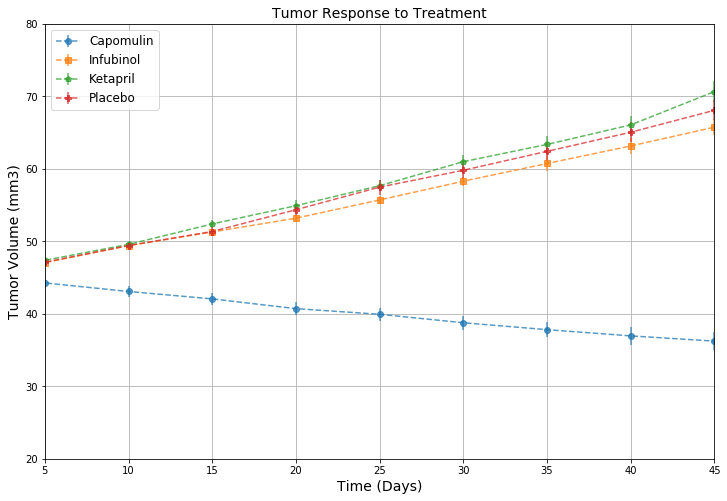

In [148]:
x_axis = np.arange(0, Tumor_Volume_Avg['Timepoint'].max()+5, 5) # Defining x_axis
plt.figure(figsize = (12,8)) # Defining figure dimensions

plt.grid() # Defining grid

plt.ylim(20, 80) # Defining y-axis limits
plt.xlim(5, Tumor_Volume_Avg['Timepoint'].max()) # Defining x-axis limits

plt.title("Tumor Response to Treatment", fontsize='14') # Defining title
plt.xlabel("Time (Days)", fontsize='14') # Defining x-label
plt.ylabel("Tumor Volume (mm3)", fontsize='14') # Defining y-label

markers = ["o", "s", "p", "P"] # List of markers for various drug names
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] # # List of labels for various drug names
count = 0 # Defining initial count to 'Zero'

# Plotting Errorbar by considering both 'Mean(Avg)' and 'Standard Error(SEM)'
for drug in Tumor_Volume_Avg[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    plt.errorbar(x_axis, Tumor_Volume_Avg[drug], Required_Sem_Unstack[drug], marker=markers[count], alpha=0.75, linestyle = '--', label=labels[count])
    count += 1 # Incrementing count

plt.legend(loc="upper left", fancybox=True, fontsize = '12') # Defining 'legend' position

plt.savefig("Tumor_Response_to_Treatment.png") # Saving figure
plt.show() # Showing figure

In [ ]:
# *** Metastatic Response to Treatment ***

In [57]:
# Defing pd.pivot_table to get the below DataFrame format
Metastatic_Avg = pd.pivot_table(Pymaceuticals_required_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)

In [58]:
Metastatic_Avg.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [59]:
Metastatic_Avg.reset_index(inplace=True) # Reseting Index to read respective column names
Metastatic_Avg.dropna()
#Metastatic_Avg_df = Metastatic_Avg[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

In [63]:
# Calulating Standard Error [SEM] of 'Metastatic Sites' based on 'Drug' & 'Timepoint' indexes.
Metastatic_Error = pd.DataFrame(Pymaceuticals_required_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
Metastatic_Error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [64]:
Metastatic_Unstack = Metastatic_Error.unstack(level=0) # Unstacking the Dataframe based on 'Drug'
Metastatic_Unstack.columns = Metastatic_Unstack.columns.get_level_values(1) # Unstacking and assigning each column values to specific 'Drug'
Metastatic_Unstack.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


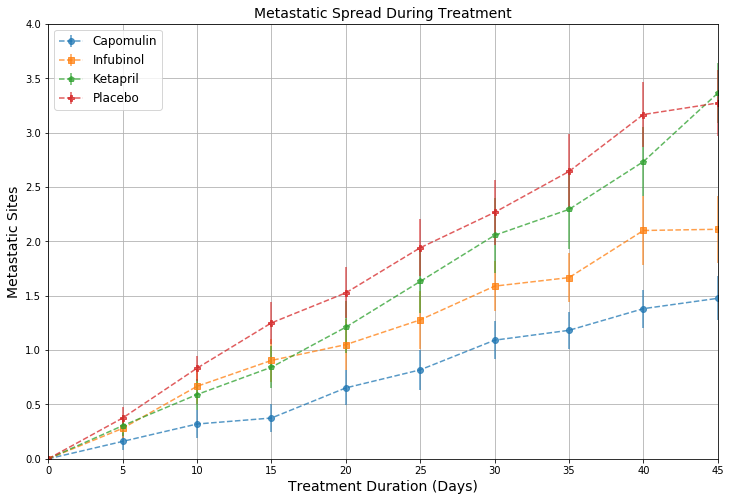

In [147]:
x_axis = np.arange(0, Metastatic_Avg_df['Timepoint'].max()+5, 5) # Defining x-axis
plt.figure(figsize=(12,8)) # Defining figure dimensions

plt.grid() # Defining grid

plt.ylim(0,4) # Defining y-axis limit
plt.xlim(0, Metastatic_Avg_df['Timepoint'].max()) # Defining x-axis limit

plt.title("Metastatic Spread During Treatment", fontsize='14') # Defining title
plt.xlabel("Treatment Duration (Days)", fontsize='14') # Defining x-label
plt.ylabel("Metastatic Sites", fontsize='14') # Defining y-label

count = 0 # Initializing count value as 'Zero'

# Plotting Errorbar by considering both 'Mean(Avg)' and 'Standard Error(SEM)'
for drug in Metastatic_Avg_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
        plt.errorbar(x_axis, Metastatic_Avg_df[drug], Metastatic_Unstack[drug], marker=markers[count], alpha=0.75, linestyle = '--', label=labels[count])
        count += 1

plt.legend(loc="upper left", fancybox=True, fontsize='12') #Defining legend location

plt.savefig("Metastatic_Spread_During_Treatment.png") # Saving figure
plt.show() # Showing figure

In [ ]:
# *** Survival Rates ***

In [98]:
# Defing pd.pivot_table to get the below DataFrame format
Survival_count = pd.pivot_table(Pymaceuticals_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'], aggfunc=len)
Survival_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [99]:
Survival_count.reset_index(inplace=True) # Resetting Index
Survival_count.dropna()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [100]:
New_Survival_df = Survival_count[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']] # Retrieving specific columns

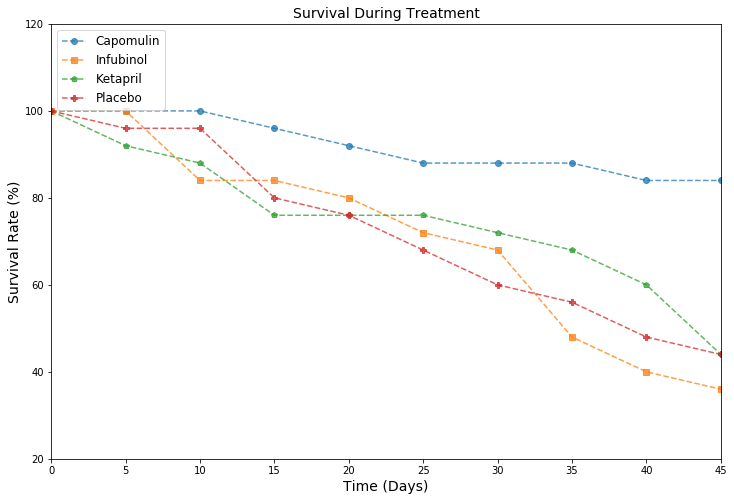

In [146]:
x_axis = np.arange(0, New_Survival_df['Timepoint'].max()+5, 5) # Defining x-axis
plt.figure(figsize=(12,8)) # Defining figure size

plt.ylim(20, 120) # Defining y-axis limits
plt.xlim(0, New_Survival_df['Timepoint'].max()) # Defining x-axis limits

plt.title("Survival During Treatment", fontsize = '14') # Defining title
plt.xlabel("Time (Days)", fontsize = '14') # Defining x-axis label
plt.ylabel("Survival Rate (%)", fontsize = '14') # Defining x-axis label

count = 0 # Re-initialising count as 'Zero'

for drug in New_Survival_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    yvals = New_Survival_df[drug]/New_Survival_df.loc[0,drug]*100 
    plt.errorbar(x_axis, yvals, marker=markers[count], linestyle = '--', alpha=0.75, label=labels[count])
    count += 1
    
plt.legend(loc="upper left", fancybox=True, fontsize = '12') # Defining legend
plt.savefig("Survival_During_Treatment.png") # Saving figure
plt.show() # Showing the plot

In [ ]:
# *** Summary Bar Graph ***

In [136]:
Tumor_volume = pd.DataFrame(Pymaceuticals_required_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
Tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [137]:
Tumor_volume = Tumor_volume.unstack(level = 0)
Tumor_volume.columns = Tumor_volume.columns.get_level_values(1)
Tumor_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [138]:
Tumor_Perc_Change = (Tumor_volume.loc[45,:] - Tumor_volume.loc[0,:])/Tumor_volume.loc[0,:]*100
Tumor_Perc_Change_df = pd.DataFrame(Tumor_Perc_Change)
Tumor_Perc_Change_df 

,0
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [139]:
Tumor_Perc_Change.index

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

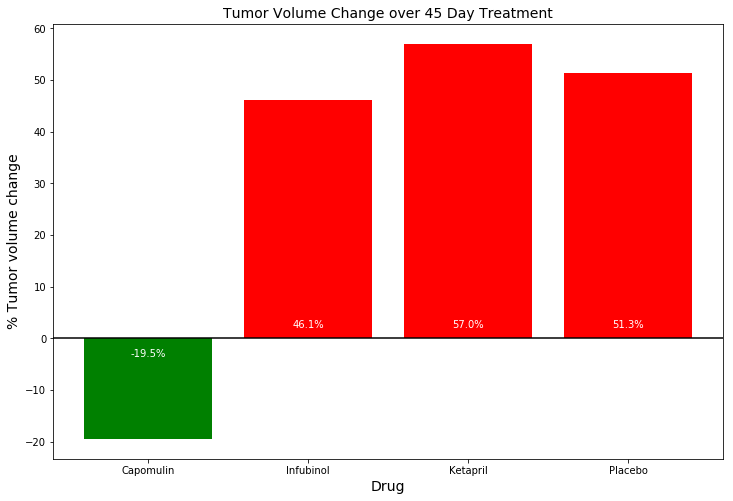

In [145]:
#x_axis = np.arange(0, New_Survival_df['Timepoint'].max()+5, 5)
plt.figure(figsize=(12,8))

xlabels = Tumor_Perc_Change.index 
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.xticks(np.arange(len(xlabels)), xlabels) # Defining xticks
plt.xlabel("Drug", fontsize = '14') # Defining x-label name

plt.title("Tumor Volume Change over 45 Day Treatment", fontsize = '14') # Defining Title name
plt.ylabel("% Tumor volume change", fontsize = '14') # Defining y-axis label



plt.bar(np.arange(4), 
        Tumor_Perc_Change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if Tumor_Perc_Change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in Tumor_Perc_Change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1

plt.savefig("Tumor_Volume_Change_over_45_Day_Treatment.png") # Saving figure
plt.show()